In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler

In [37]:
X = np.genfromtxt('../datasets/Selective_descriptors_X')
Y = np.genfromtxt('../datasets/Selective_descriptors_Y')
Y_error = np.genfromtxt('../datasets/Selective_descriptors_error')
X = StandardScaler().fit_transform(X)
X_train,X_test,Y_train,Y_test,e_train,e_test = train_test_split(X,Y,Y_error,test_size=0.05,random_state=1010)

print(X_train.shape,X_test.shape)
print(Y_train.shape,Y_test.shape)
print(e_train.shape,e_test.shape)

(2396, 21) (127, 21)
(2396,) (127,)
(2396,) (127,)


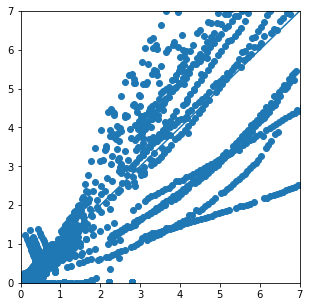

In [26]:
#regr = SVR(kernel='poly',degree=6)
regr = SVR(kernel='rbf',epsilon=0.1)
regr.fit(X_train,Y_train)
plt.figure(figsize = (5,5) )
plt.scatter(regr.predict(X_train),Y_train)
plt.plot(np.linspace(0,7),np.linspace(0,7))
plt.xlim((0,7))
plt.ylim((0,7))
plt.show()

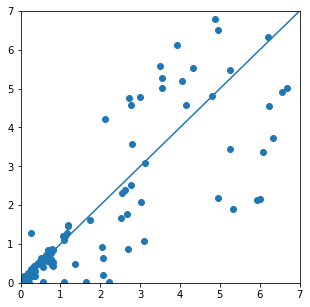

In [19]:
plt.figure(figsize = (5,5) )
plt.scatter(regr.predict(X_test),Y_test)
plt.plot(np.linspace(0,7),np.linspace(0,7))
plt.xlim((0,7))
plt.ylim((0,7))
plt.show()

/Users/maomoke/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


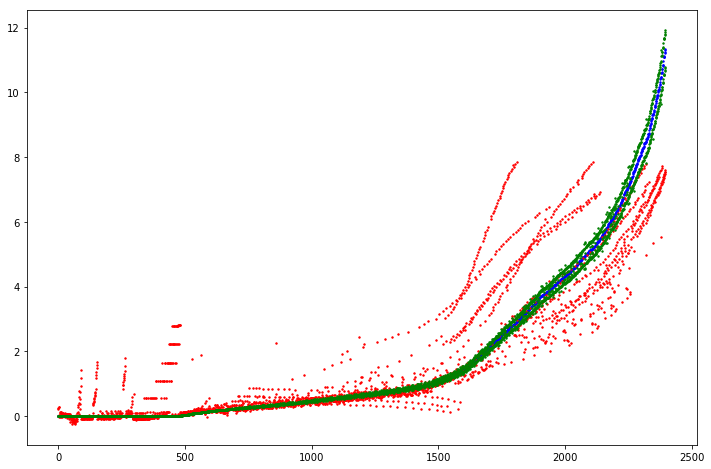

In [54]:
result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_train
result.Prediction = regr.predict(X_train)
result.error = e_train
result = result.sort(['Experiment','Prediction'],ascending=[1,1])
size=2
plt.figure(figsize=(12,8))
plt.scatter(np.arange(X_train.shape[0]),result.Experiment,color="blue",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Prediction,color="red",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Experiment+result.error,color="green",s=size)
plt.scatter(np.arange(X_train.shape[0]),result.Experiment-result.error,color="green",s=size)
plt.show()

/Users/maomoke/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


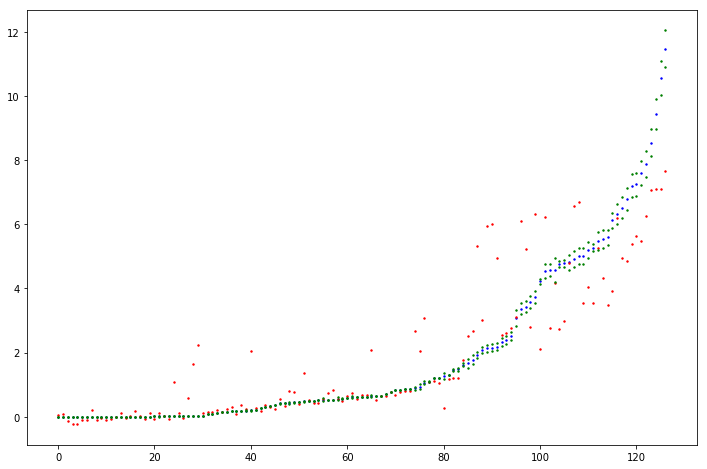

In [55]:
result = pd.DataFrame(columns=['Experiment','Prediction','error'])
result.Experiment = Y_test
result.Prediction = regr.predict(X_test)
result.error = e_test
result = result.sort(['Experiment','Prediction'],ascending=[1,1])
size = 2
plt.figure(figsize=(12,8))
plt.scatter(np.arange(X_test.shape[0]),result.Experiment,color="blue",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Prediction,color="red",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Experiment+result.error,color="green",s=size)
plt.scatter(np.arange(X_test.shape[0]),result.Experiment-result.error,color="green",s=size)
plt.show()